In [1]:
#1
import numpy as np
a=np.random.random((10, 3))
print(a)
print(np.min(abs(a-0.5)+0.5, axis=1))

[[0.67178507 0.65108702 0.47241168]
 [0.47352538 0.09597372 0.23199749]
 [0.8333399  0.26422561 0.29808664]
 [0.39431148 0.11907854 0.35828697]
 [0.91608022 0.57601461 0.12587298]
 [0.74834516 0.46780282 0.86028227]
 [0.59507428 0.15414264 0.58743685]
 [0.02387177 0.74259898 0.35077314]
 [0.40286996 0.97259599 0.40224622]
 [0.41074658 0.90457024 0.22930907]]
[0.52758832 0.52647462 0.70191336 0.60568852 0.57601461 0.53219718
 0.58743685 0.64922686 0.59713004 0.58925342]


In [3]:
#2
import numpy as np
a=np.random.random((6, 6))
print(a)
#d=[np.min(a[:, b]) for b in range(6)]
#c=[np.sum(b) for b in a]
c=a.sum(axis=1)
d=a.min(axis=0)
#print(c)
#print(d)
#print([c[m]/np.min(a[:, m]) for m in range(6)])
print(c/d)

[[0.22176254 0.81979778 0.14401187 0.4027753  0.18710732 0.13368915]
 [0.33083132 0.07080323 0.1555916  0.54972365 0.78815499 0.35792781]
 [0.24518068 0.66588011 0.87107089 0.82699977 0.28711521 0.77632988]
 [0.35258101 0.56771926 0.59662868 0.7084584  0.94145747 0.33053568]
 [0.66125117 0.18795305 0.73199604 0.27488106 0.91163398 0.36709719]
 [0.11802316 0.97394416 0.97718575 0.11496625 0.36191321 0.00779446]]
[ 16.17601186  31.82104057  25.50190103  30.4209328   16.75408815
 327.64648082]


In [14]:
#3
import numpy as np
x=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
k=np.array([x[i] for i in range(1, 9) if x[i-1] == 0]).max()
print(k)

5


In [18]:
#4
import numpy as np
x=np.ones(10)
i=np.array([0, 1, 2, 3, 5, 5, 5, 8])
for b in i: x[b]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [20]:
#5
import numpy as np
a = np.arange(16).reshape(4, 4)
#b={k: [] for k in range(7)}
b=[np.diagonal(a[:, ::-1], k) for k in range(3, -3, -1)]
print(b)

[array([0]), array([1, 4]), array([2, 5, 8]), array([ 3,  6,  9, 12]), array([ 7, 10, 13]), array([11, 14])]


<Figure size 600x400 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Number centroids: 2
[[ 0.65411722  0.37604688]
 [-1.08646921 -0.80302807]]
[54.60269031 25.00312045]


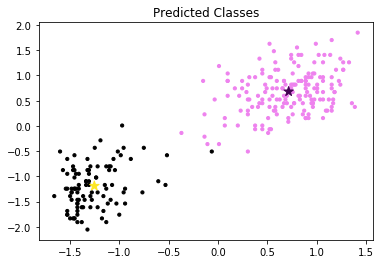

In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random
data = np.loadtxt('Oldfaithful.txt', skiprows=0)[:, :]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()
n=np.mean(data, axis=0)
data=(data-n)/(np.mean((data-n)**2, axis=0))**(1/2)    
plt.scatter(*data.T)
plt.show()
N=int(input("Number centroids: "))
centroids=data[np.random.choice(np.arange(len(data)), N, False)]
#co=(len(data))/2
co=int(data.size/2)
print(centroids)
def getlabels(pt, centroids, co, N):
    a=np.vstack(pt-centroids[i] for i in range(N))
    b=np.linalg.norm(a,axis=1)
    dist=b.reshape(N,co).transpose()
    return np.argmin(dist, axis=1)
def kmeans(data,centroids,diagnosis, co, N):
    labels=getlabels(data, centroids, co, N)
    #newcentoids=centroids
    d=1
    step=0
    while d>diagnosis:
        newcentroids=centroids
        for i in range(N): centroids[i]=np.sum(data[labels==i],axis=0)/np.sum(labels==i)
        labels=getlabels(data, centroids, co, N)    
        d=max(np.linalg.norm(centroids[i]-newcentroids[i]) for i in range(N))
        #step+=1
   # centroids=newcentroids
    distortion=np.array([np.sum((np.linalg.norm(data[labels==i]-centroids[i]))**2) for i in range(N)])
    return centroids, distortion    
centroids, d=kmeans(data,centroids,0.00000001, co, N)
print(d)
labels = getlabels(data, centroids, co, N)
import matplotlib.pyplot as plt
%matplotlib inline
col=lambda: random.randint(0, 255)
labels = getlabels(data, centroids, co, N)
#plt.scatter(*data.T, c=np.where(labels, "col() for i in range(N)"), s=10)
plt.scatter(*data.T, c=np.where(labels, "black", "violet"), s=10)
plt.scatter(*centroids.T, c=[col() for i in range(N)], s=100, marker='*')
plt.title('Predicted Classes')
plt.show()